In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
#shape of the data
df.shape

(70000, 13)

In [14]:
#check if they're null values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [15]:
#get data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [16]:
#description of data stats
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#add overweight column by calculating bmi & divide by weight in kg by the square of their heights if value >25 that person is 
#OVERweight

df['overweight'] = (df['weight'] / df['height']/100**2)>25
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,False
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,False
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,False
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,False
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,False
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,False


In [18]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
#If the value is more than 1, make the value 1

df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,False
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,False
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,False
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,False
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,False
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,False


In [23]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', \ 
#'active', and 'overweight'.
df_cat = pd.melt(
    df,id_vars=['cardio'],
    value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,False
419996,1,overweight,False
419997,1,overweight,False
419998,1,overweight,False


In [29]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
#You will have to rename one of the collumns for the catplot to work correctly.
df_cat = pd.DataFrame(
    df_cat.groupby(['cardio','variable','value'])['value'].count()).rename(columns ={'value':'total'}).reset_index()
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,35021
9,0,smoke,0,31781


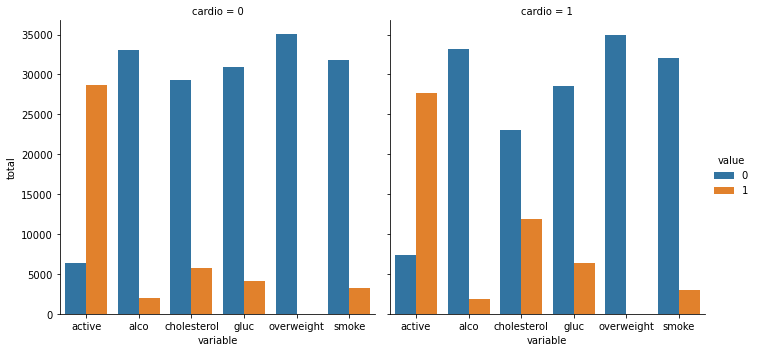

In [32]:
# Draw the catplot with 'sns.catplot()'
sns.catplot(x='variable',
           y='total',
           hue='value',
           col='cardio',
           kind='bar',
           data = df_cat)


In [34]:
# draw a heat map
#clean the data

df_heat_map = df[(df['ap_lo']<=df['ap_hi'])&
(df['height']>=df['height'].quantile(0.025))&
(df['height']<=df['height'].quantile(0.975))&
(df['weight']>=df['weight'].quantile(0.025))&
(df['weight']<=df['weight'].quantile(0.0975))]

df_heat_map


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,False
17,27,16747,1,158,52.0,110,70,0,1,0,0,1,0,False
19,29,21755,2,162,56.0,120,70,0,0,1,0,1,0,False
35,47,20404,1,163,55.0,120,80,0,0,0,0,1,0,False
60,77,19105,1,159,58.0,110,70,0,0,0,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69928,99890,14420,1,160,55.0,140,90,0,0,0,0,1,0,False
69937,99908,14489,1,160,53.0,90,60,0,0,0,0,1,0,False
69943,99919,22570,2,160,55.0,140,90,1,0,0,0,1,1,False
69951,99934,15254,1,158,55.0,110,70,0,0,0,0,1,0,False


In [35]:
# Calculate the correlation matrix
corr = df_heat_map.corr()

In [36]:
# Generate a mask for the upper triangle
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True


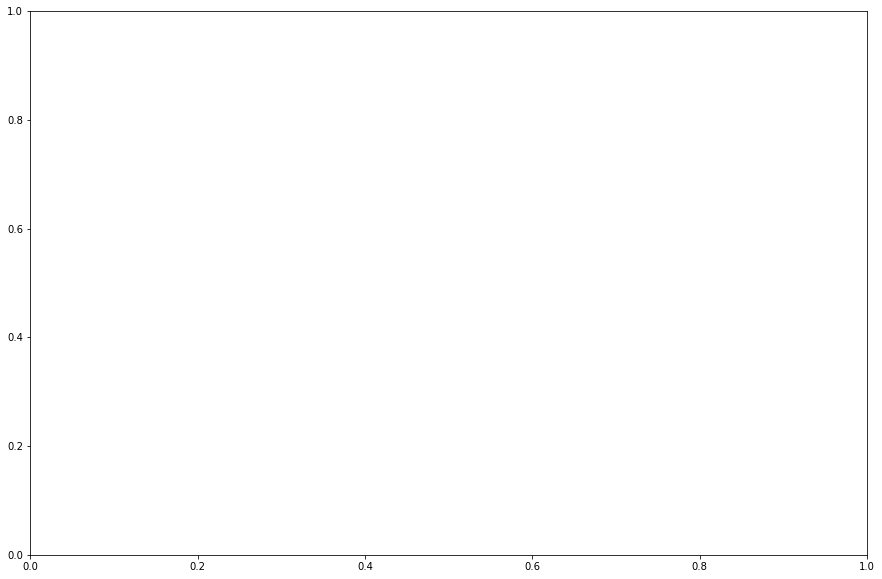

In [39]:
# Set up the matplotlib figure

fig,ax=plt.subplots(figsize=(15,10))

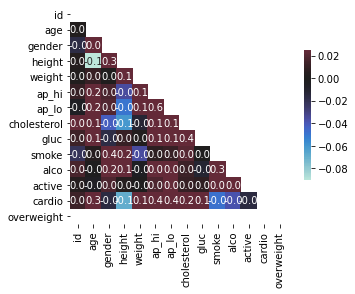

In [51]:
 ax = sns.heatmap(corr,
           annot=True,
           fmt='.1f',
           mask=mask,
           square=True,
           center=0,
           vmax=0.025,
           cbar_kws={'shrink':.60})
fig.savefig('heatmap.png')
